# COURSE: Master math by coding in Python
## SECTION: Linear algebra

#### www.udemy.com/master-math-with-python
#### INSTRUCTOR: sincxpress.com

Note about this code: Each video in this section of the course corresponds to a section of code below. Please note that this code roughly matches the code shown in the live recording, but is not exactly the same -- the variable names, order of lines, and parameters may be slightly different.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from IPython.display import display, Math

# Linear algebra BUG HUNT!!

In [2]:
# create a column vector
cv = np.array([[-2], [3]])

display(Math(sym.latex(sym.sympify(cv))))

<IPython.core.display.Math object>

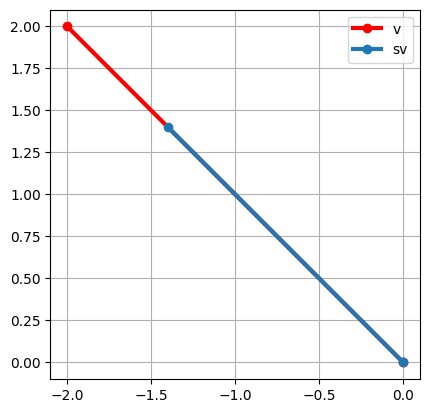

In [21]:
# visualize scalar-vector multiplication

v = np.array([-2,2])
s = .7

sv = np.array([s,s]).T*v
plt.plot([0,v[0]],[0,v[1]],'ro-',linewidth=3,label='v')
plt.plot([0,sv[0]],[0,sv[1]],'o-',linewidth=3,label='sv')

plt.axis([-3,3,-3,3])
plt.axis('square')
plt.legend()
plt.grid()
plt.show()

In [22]:
# algorithm to compute the dot product
v = np.random.randn(8)
w = np.random.randn(8)

dp1 = 0
for i in range(0,len(v)):
    dp1 += v[i]*w[i]

dp2 = np.dot(v,w)

print(str(dp1) + '\t' + str(dp2))

-1.575929515129705	-1.575929515129705


In [23]:
# number of data points
n = 10

# data
data1 = np.arange(0,n) + np.random.randn(n)
data2 = np.arange(0,n) + np.random.randn(n)

#mean-center
data1 -= np.mean(data1)
data2 -= np.mean(data2)

# compute correlation
numer = np.dot(data1,data2)
denom = np.sqrt(np.dot(data1,data1)) * np.sqrt(np.dot(data2,data2))
r1 = numer/denom

# confirm with numpy function
r2 = np.corrcoef(data1,data2)[1][0]

print(r1)
print(r2)

0.9714118930413227
0.9714118930413224


In [30]:
# outer product computation
o1 = np.random.randint(0,10,9)
o2 = np.random.randint(0,10,4)

outermat = np.zeros((len(o1),len(o2)))

for i in range(len(o1)):
    outermat[i,:] = o1[i]*o2

print(outermat-np.outer(o1,o2))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [32]:
# matrix multiplication
A = np.random.randn(5,5)
I = np.eye(5)
A@I

array([[-0.54364033, -0.63722512,  0.04515597,  1.11150099, -0.65894557],
       [ 0.33431504, -1.14849012,  0.25911092,  1.04189266,  0.708229  ],
       [-2.68348602, -0.41992112,  1.15463455, -1.54996817, -0.35568535],
       [ 0.95698679,  0.28116335, -0.80096443, -0.66389134,  0.61435701],
       [-0.67188586,  1.05631603, -1.90345662, -0.18558297,  1.13260793]])

In [36]:
# matrix multiplication
A = np.random.randn(5,5)
I = np.eye(5)

print(A)
print(' ')
print(A@I)

[[-1.4783974   0.52982391 -1.57074831 -1.77481738  1.39227839]
 [ 0.47502947  0.41079053 -1.39110051 -0.72595186 -0.01571947]
 [-0.56830426 -1.20357626 -0.51238711  1.86077521 -0.60645351]
 [ 0.67952487  0.7318264   0.30040504 -1.80593508  1.87025489]
 [ 0.92386399 -0.32497044 -1.1768381  -1.07294642  1.1938617 ]]
 
[[-1.4783974   0.52982391 -1.57074831 -1.77481738  1.39227839]
 [ 0.47502947  0.41079053 -1.39110051 -0.72595186 -0.01571947]
 [-0.56830426 -1.20357626 -0.51238711  1.86077521 -0.60645351]
 [ 0.67952487  0.7318264   0.30040504 -1.80593508  1.87025489]
 [ 0.92386399 -0.32497044 -1.1768381  -1.07294642  1.1938617 ]]


In [37]:
# random matrices are invertible
A = np.random.randint(-5,6,(5,5))
Ainv = np.linalg.inv(A)

np.round(A@Ainv,4)

array([[ 1.,  0., -0.,  0.,  0.],
       [ 0.,  1., -0., -0.,  0.],
       [-0.,  0.,  1.,  0.,  0.],
       [-0., -0.,  0.,  1.,  0.],
       [ 0., -0., -0., -0.,  1.]])

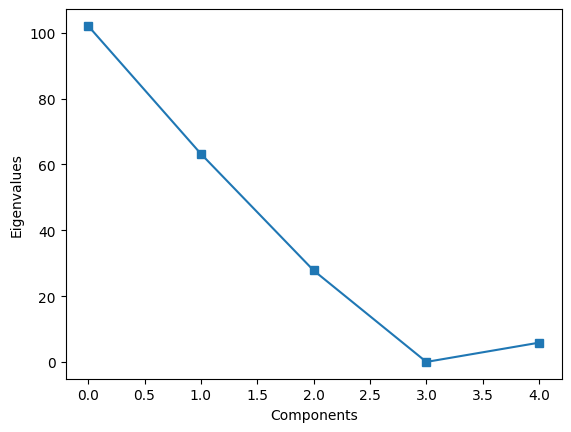

In [10]:
# plot the eigenspectrum
# the matrix
M = np.random.randint(-5,5,(5,5))
M = M@M.T

# its eigendecomposition
eigvals,eigvecs = np.linalg.eig(M)

plt.plot(np.matrix.flatten(eigvals),'s-')
plt.xlabel('Components')
plt.ylabel('Eigenvalues')

plt.show()

(10, 10) (10,) (20, 20)


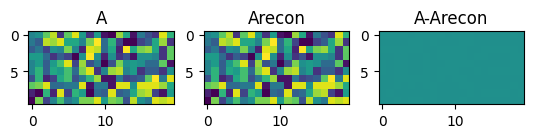

In [40]:
# Reconstruct a matrix based on its SVD
A = np.random.randint(-10,11,(10,20))

U,s,V = np.linalg.svd(A)
print(np.shape(U),np.shape(s),np.shape(V))
# # reconstruct S
S = np.zeros(np.shape(A))
for i in range(len(s)):
    S[i,i] = s[i]

Arecon = U@S@V

fig,ax = plt.subplots(1,3)

ax[0].imshow(A,vmin=-10,vmax=10)
ax[0].set_title('A')

ax[1].imshow(Arecon,vmin=-10,vmax=10)
ax[1].set_title('Arecon')

ax[2].imshow(A-Arecon,vmin=-10,vmax=10)
ax[2].set_title('A-Arecon')

plt.show()